<a href="https://colab.research.google.com/github/srilalithaveerubhotla/Text_Transformations/blob/main/Semantic_Similarity_comprision_on_BERT_GPT_ELMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Downloading the word embeddings

In [1]:
import numpy as np
!pip3 install numpy --upgrade

     |████████████████████████████████| 14.5MB 429kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [2]:
!pip3 install bert-embedding
!pip3 install allennlp
!pip3 install pytorch_transformers

     |████████████████████████████████| 29.6MB 294kB/s 
     |████████████████████████████████| 215kB 45.5MB/s 
     |████████████████████████████████| 13.8MB 20.6MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp36-none-any.whl size=259916 sha256=37957bcc7bca5e568114829f647b4ae637b91c7fd9220314d557b1e8e4a0669d
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: s

     |████████████████████████████████| 512kB 5.3MB/s 
     |████████████████████████████████| 1.3MB 8.2MB/s 
     |████████████████████████████████| 317kB 24.0MB/s 
     |████████████████████████████████| 266kB 23.7MB/s 
     |████████████████████████████████| 133kB 33.8MB/s 
     |████████████████████████████████| 890kB 30.2MB/s 
     |████████████████████████████████| 2.9MB 27.6MB/s 
     |████████████████████████████████| 1.1MB 46.4MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 7.1MB 22.5MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp36-cp36m-linux_x86_64.whl size=3387950 sha256=bb69019234d2b8182745b018154dd9aef1311fca0f126e9c82c1fe917ad8c83f
  Stored in directory: /root/.cache/pip/wheels/26/7a/37/7dbcc30a6b4efd17b91ad1f0128b7bbf84813bd4e1cfb8c1e3
  Created wheel for overrides: filename=overrides-3.1.0-cp36-none-any.whl size=10175 sha256=6fda3143baaed45230cf5c849cec3b1b6d2086d11e4858ad6252c362a59d19d0
  Stored in di

In [7]:
!pip install allennlp==0.4.2

     |████████████████████████████████| 716kB 5.4MB/s 
     |████████████████████████████████| 1.7MB 19.8MB/s 
     |████████████████████████████████| 3.5MB 46.3MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 25.2MB 57.0MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 430kB 47.4MB/s 
     |████████████████████████████████| 496.4MB 28kB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 512kB 37.8MB/s 
     |████████████████████████████████| 245kB 53.2MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 552kB 46.8MB/s 
     |████████████████████████████████| 1.9MB 45.2MB/s 
     |████████████████████████████████| 184kB 53.2MB/s 
     |████████████████████████████████| 153kB 48.5MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 614kB 39.6MB/s 


In [8]:
!pip install --upgrade numpy
import scipy

import nltk
nltk.download('punkt')

import tarfile

from nltk.tokenize import word_tokenize
from bert_embedding import BertEmbedding
from allennlp.commands.elmo import ElmoEmbedder

import torch
from pytorch_transformers import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.4)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocessing:
* Tokenize sentences
* Assigning corresponding word embeddings
* Create cosine similarity matrix based on the distances between the word embeddings.

In [9]:
class Embeddings:
  
  def __init__(self, sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.tokenized_sent_1 = word_tokenize(self.sentence_1)
    self.tokenized_sent_2 = word_tokenize(self.sentence_2)
    
  def get_elmo_embedding(self):
    '''Creates ELMo word embeddings for the given words
    param: list, list
    returns: ndarray, ndarray
      Returns the ELMo embeddings of the tokens of two sentences'''
    
    elmo = ElmoEmbedder()
    
    elmo_embedding_1 = elmo.embed_sentence(self.tokenized_sent_1)
    elmo_embedding_2 = elmo.embed_sentence(self.tokenized_sent_2)

    return elmo_embedding_1, elmo_embedding_2
    
  def get_bert_embedding(self):
    '''Creates word embeddings taken from BERT language representation
    returns: list, list
      Returns the BERT embeddings of the tokens of two sentences'''
    
    bert_embedding_1  = BertEmbedding().embedding(sentences = self.tokenized_sent_1)
    bert_embedding_2  = BertEmbedding().embedding(sentences = self.tokenized_sent_2)
    
    return bert_embedding_1, bert_embedding_2
    
  def get_gpt_embedding(self):
    '''Creates word embeddings of GPT
    returns: tensor
      Returns the GPT embeddings of the tokens of two sentences'''
    
    model= torch.hub.load('huggingface/pytorch-pretrained-BERT', 'openAIGPTModel', 'openai-gpt')
    tokenizer=torch.hub.load('huggingface/pytorch-pretrained-BERT', 'openAIGPTTokenizer', 'openai-gpt')

    indexed_token_1 = tokenizer.convert_tokens_to_ids(self.tokenized_sent_1)
    indexed_token_2 = tokenizer.convert_tokens_to_ids(self.tokenized_sent_2)
    
    tokens_tensor_1 = torch.tensor([indexed_token_1])
    tokens_tensor_2 = torch.tensor([indexed_token_2])

    gpt_embedding_1 = model(tokens_tensor_1)
    gpt_embedding_2 = model(tokens_tensor_2)

    return gpt_embedding_1, gpt_embedding_2

### Converting Embeddings to list 

In [10]:
class Embedding2Array:
  def elmo(self,embedding):
    ''' Creates the list of arrays of each corresponding word
    parameters
    embedding : ndarray
    returns: list
      Returns the list of elmo embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding[2])):
      word_array.append(embedding[2][i])
    return word_array
    
  def bert(self,embedding):
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: list
    returns: list
      Returns the list of BERT embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i][1][0])
    return word_array
  
  def gpt(self,embedding):
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: tensor
    returns: list
      Returns the list of GPT embedding of each word 
    '''
    word_array = []

    for i in range(embedding[0].shape[1]):
      word_array.append(embedding[0][0][i].tolist())

    return word_array

 ## Processing:
 * Creating a cosine similarity matrix
 * Plotting the similarity matrix based on the cosine matrix from preprocessing class
 * Creating a list of similar words of one sentence for each word in the other sentence.

In [11]:
class SimilarityFunctions:

  def __init__(self, sentence_1, sentence_2, word_array_1, word_array_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.word_array_1 = word_array_1
    self.word_array_2 = word_array_2
  
  def cosine_similarity_matrix(self):
    '''
    Creates a matrix depicting the cosine distances between the words of two sentences
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(self.word_array_1), len(self.word_array_2)))

    for i in range(0, len(self.word_array_1)):
      for j in range(0, len(self.word_array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(self.word_array_1[i], self.word_array_2[j])
    return matrix.T
  
  def plot_similarity_matrix(self, title):
    '''Plot the similarity matrix of two sentences
    param:
    title: str
      Labels the plot with the corresponding title
    returns: None
    '''
    x_labels, y_labels = word_tokenize(self.sentence_1), word_tokenize(self.sentence_2)
    similarity_matrix = self.cosine_similarity_matrix()
    sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu", annot = True)
    plt.title(title)
    plt.show()    
  
  def get_similar_words(self):
    '''Prints similar word from second sentence for each word in the first sentence
    returns: list of similar words
    '''

    token_1 = word_tokenize(self.sentence_1)
    token_2 = word_tokenize(self.sentence_2)
    
    similarity_matrix = self.cosine_similarity_matrix()
    
    similar_word_dict = {}
    for row in range(0,len(similarity_matrix[0])):
      
      min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
      index = (np.where(similarity_matrix.T[row] == min_val))[0]
      similar_word_list = []
      
      for i in range(0,len(index)):
        similar_word_list.append(token_2[index[i]])
      similar_word_dict[token_1[row]] = similar_word_list
      
    print('Similar words in two sentences are :', similar_word_dict)

In [12]:
class Main:
  def __init__(self, sentence_1, sentence_2):
    self.first_sentence = sentence_1
    self.second_sentence = sentence_2

  def elmo(self):
    ''' Creates a list of ELMo word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''

    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_elmo_embedding()
    first_array, second_array = embed2array.elmo(first_embedding), embed2array.elmo(second_embedding)
    return first_array, second_array

  def bert(self):
    '''Creates a list of BERT word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''
    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_bert_embedding()
    first_array, second_array = embed2array.bert(first_embedding), embed2array.bert(second_embedding)
    return first_array, second_array

  def gpt(self):
    '''Creates a list of GPT word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''
    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_gpt_embedding()
    first_array, second_array = embed2array.gpt(first_embedding), embed2array.gpt(second_embedding)
    return first_array, second_array

--------------------------------------------------------------------------------

In [13]:
class AnalyzeWordEmbeddings:
  def __init__(self,sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    
  def bert(self):
    '''Plots similarity matrix using BERT embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using BERT embeddings
    '''    
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.bert()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using BERT embeddings')
    similarityfunc.get_similar_words()
  
  def elmo(self):
    '''Plots similarity matrix using ELMo embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using ELMo embeddings
    '''      
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.elmo()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using ELMo embeddings')
    similarityfunc.get_similar_words()
  
  def gpt(self):
    '''Plots similarity matrix using GPT embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using GPT embeddings
    '''    
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.gpt()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using GPT embeddings')
    similarityfunc.get_similar_words()

--------------------------------------------------------------------------------

In [14]:
first_sentence_1 = "Abstraction and reusability."
second_sentence_1 = "the main advantages to object-oriented programming  is data abstraction, easier maintenance, and re-usability." 

In [15]:
first_sentence_2 = "A man cuts a tomato"
second_sentence_2 = "A woman cuts a potato"

In [16]:
first_sentence_3 = "Flowers blossom in spring."
second_sentence_3 = "Suspension works on spring mechanism."

* Input the sentences and required functions

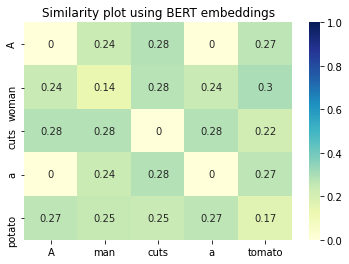

Similar words in two sentences are : {'A': ['A', 'a'], 'man': ['woman'], 'cuts': ['cuts'], 'a': ['A', 'a'], 'tomato': ['potato']}


In [19]:
analyze_word_embed = AnalyzeWordEmbeddings(first_sentence_2, second_sentence_2)
analyze_word_embed.bert()
# analyze_word_embed.elmo()
# analyze_word_embed.gpt()

<b> Note:</b> 
* The lighter the map is the more similar the words are...
*First_sentence_1 and second_sentence_1 are the sentences from "Mohler dataset."